In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import h5py

In [6]:
f = h5py.File('/users/mandalia/programs/pisa/pisa/resources/events/DC/2015/mdunkman/1XXXX/Joined/DC_MSU_1X585_joined_nu_nubar_events_mc.hdf5')

In [7]:
for name in f.iterkeys():
    print name

nue
nue_bar
numu
numu_bar
nutau
nutau_bar


In [8]:
print f['numu']['cc'].keys()
e_numu = np.array(f['numu']['cc']['reco_energy'])
pid_numu = np.array(f['numu']['cc']['pid'])
wei_numu = np.array(f['numu']['cc']['weighted_aeff'])

[u'pid', u'reco_coszen', u'reco_energy', u'true_coszen', u'true_energy', u'weighted_aeff']


[   6.66          5.07732323    3.33       ...,   75.99224416  109.99246334
   65.26415612] [  7.59972147  -0.04335284   3.09200791 ...,   7.70858237  14.74418869
  13.34114676] [  3.33607908e-11   1.99130560e-10   1.45370577e-11 ...,   2.98675498e-06
   5.98151128e-07   1.84013912e-06]
-374.015930158 957.061599846


[]

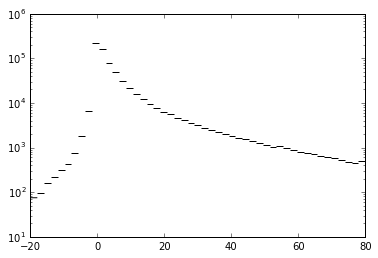

In [27]:
print e_numu, pid_numu, wei_numu
print np.min(pid_numu), np.max(pid_numu)
plt.hist(pid_numu, bins=np.linspace(-20, 80, 50))
plt.semilogy()

In [11]:
track_mask = (pid_numu > 3)
print track_mask

[ True False  True ...,  True  True  True]


# Unweighted distributions

<function matplotlib.pyplot.ylim>

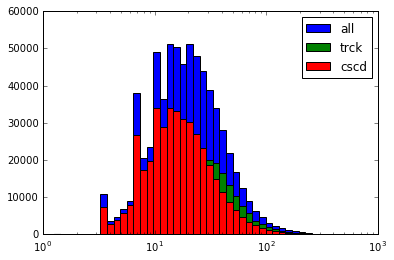

In [12]:
bins = np.logspace(1E-1, 3)
#bins = np.linspace(-1, 1)
logx = True
#logx = False

n_a, bins, patches = plt.hist(e_numu, bins=bins, label='all')
n_t, bins, patches = plt.hist(e_numu[track_mask], bins=bins, label='trck')
n_c, bins, patches = plt.hist(e_numu[~track_mask], bins=bins, label='cscd')
if logx: plt.semilogx()
plt.legend()
plt.ylim

# Weighted distributions

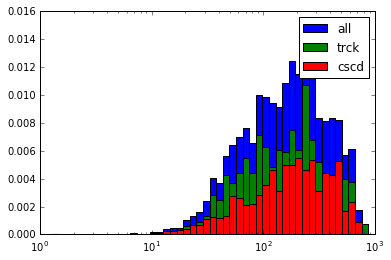

In [13]:
n_a, bins, patches = plt.hist(e_numu, weights=wei_numu, bins=bins, label='all')
n_t, bins, patches = plt.hist(e_numu[track_mask], weights=wei_numu[track_mask], bins=bins, label='trck')
n_c, bins, patches = plt.hist(e_numu[~track_mask], weights=wei_numu[~track_mask], bins=bins, label='cscd')
if logx: plt.semilogx()
plt.legend()

#### Track plot to match against

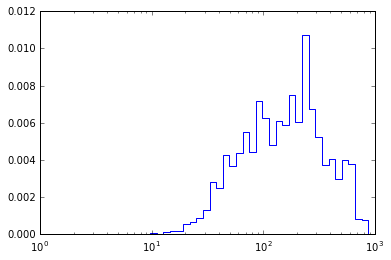

In [16]:
diff = n_a-n_c
diff = np.concatenate(([diff[0]], diff))
plt.plot(bins, diff, drawstyle='steps-pre')
if logx: plt.semilogx()

# Without weights

In [17]:
e_numu_trck = e_numu[track_mask]
e_numu_cscd = e_numu[~track_mask]
trck_hist, bin_edges = np.histogram(e_numu_trck, bins=bins)
cscd_hist, bin_edges = np.histogram(e_numu_cscd, bins=bins)
prob_trans_trck = np.ma.masked_invalid(trck_hist / (trck_hist.astype(float)+cscd_hist))
prob_trans_cscd = np.ma.masked_invalid(cscd_hist / (trck_hist.astype(float)+cscd_hist))

/.data/mandalia/programs/Python-2.7.10/venv2_7/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in divide
/.data/mandalia/programs/Python-2.7.10/venv2_7/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in divide


/.data/mandalia/programs/Python-2.7.10/venv2_7/lib/python2.7/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


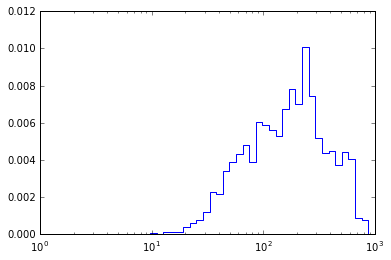

In [19]:
trck_map = n_a*prob_trans_trck
trck_map = np.concatenate(([trck_map[0]], trck_map))
plt.plot(bins, trck_map, drawstyle='steps-pre')
if logx: plt.semilogx()

# With weights

In [20]:
e_numu_trck = e_numu[track_mask]
e_numu_cscd = e_numu[~track_mask]
trck_hist, bin_edges = np.histogram(e_numu_trck, weights=wei_numu[track_mask], bins=bins)
cscd_hist, bin_edges = np.histogram(e_numu_cscd, weights=wei_numu[~track_mask], bins=bins)

prob_trans_trck = np.ma.masked_invalid(trck_hist / (trck_hist+cscd_hist))
prob_trans_cscd = np.ma.masked_invalid(cscd_hist / (trck_hist+cscd_hist))

/.data/mandalia/programs/Python-2.7.10/venv2_7/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in divide
/.data/mandalia/programs/Python-2.7.10/venv2_7/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in divide


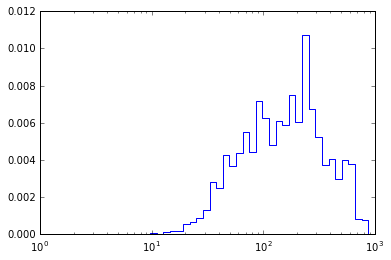

In [21]:
trck_map = n_a*prob_trans_trck
trck_map = np.concatenate(([trck_map[0]], trck_map))
plt.plot(bins, trck_map, drawstyle='steps-pre')
if logx: plt.semilogx()